In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500) ## show more columns

# Analysis of Presidential22 dataset
This section is used to analyze the Presidential22 dataset

In [5]:
from datasets import load_presidential22, feature_engineering, remove_presidential22_extra_columns

dataset = load_presidential22()
#dataset = feature_engineering(dataset)
dataset.sample(n=3)

dataset = feature_engineering(dataset)
dataset_model = remove_presidential22_extra_columns(dataset)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40217 entries, 865250843527979008 to 1286324749199712256
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   nb_tweets                     40217 non-null  int64              
 1   matching_rules                40217 non-null  object             
 2   probe_date                    40217 non-null  datetime64[ns, UTC]
 3   statuses_count                40217 non-null  int64              
 4   followers_count               40217 non-null  int64              
 5   friends_count                 40217 non-null  int64              
 6   favourites_count              40217 non-null  int64              
 7   listed_count                  40217 non-null  int64              
 8   description                   40217 non-null  object             
 9   screen_name                   40217 non-null  object             
 10  nam

In [6]:
import joblib
clf = joblib.load('rf-model.pkl')
bool_mask = clf.predict(dataset_model.select_dtypes(include=['int64', 'float64', 'bool']))

C:\Users\Obyka\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Obyka\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
print('Sample of legitimate users:')
for idx, profile in dataset[bool_mask == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))
    print(profile)
    print('\n')

Sample of legitimate users:
https://twitter.com/mimi5094813446
nb_tweets                                                                       1
matching_rules                  [{'id': '1505904684699209737', 'tag': 'Jean-Lu...
probe_date                                       2022-04-08 16:55:01.544742+00:00
statuses_count                                                               6771
followers_count                                                                71
friends_count                                                                  80
favourites_count                                                            18179
listed_count                                                                    0
description                                                                      
screen_name                                                        mimi5094813446
name                                                                       mimi50
geo_enabled                        

In [8]:
print('Sample of bot users:')
for idx, profile in dataset[bool_mask == 1].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of bot users:
https://twitter.com/100patatesss
https://twitter.com/tvlofficiel
https://twitter.com/__78170
https://twitter.com/Miguel35423981
https://twitter.com/EMarty24110
https://twitter.com/cceltika
https://twitter.com/mzgr_elias
https://twitter.com/Olivier_Monteil
https://twitter.com/mpbarrouillet
https://twitter.com/SpiacyKozak


In [28]:
print(dataset[bool_mask == 0].count())

default_profile                 14402
description_length              14402
favourites_count                14402
favourites_growth_rate          14402
followers_count                 14402
followers_friends_ratio         14402
followers_growth_rate           14402
friends_count                   14402
friends_growth_rate             14402
geo_enabled                     14402
has_url                         14402
listed_count                    14402
listed_growth_rate              14402
name_length                     14402
num_digits_in_name              14402
num_digits_in_screen_name       14402
profile_use_background_image    14402
screen_name_length              14402
statuses_count                  14402
tweet_freq                      14402
user_age                        14402
verified                        14402
dtype: int64
40217


# Analysis of Twibot-20 dataset
This section is used to analyze the Twibot-20 dataset (https://arxiv.org/abs/2106.13088)

## Load the train and test datasets

In [79]:
from datasets import load_twibot20

twibot20_train = load_twibot20(dataset='train')
twibot20_test = load_twibot20(dataset='test')

## Analyse the datatests

In [80]:
twibot20_train.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,8.278000e+03,8.278000e+03,8278.000000,8278.000000,8.278000e+03,8278.000000
mean,6.464586e+05,6.609915e+03,1504.488524,13297.475477,2.158684e+04,0.561247
std,4.148888e+06,6.377857e+04,9855.072510,40415.682739,9.008918e+04,0.496265
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,2.010000e+02,2.310000e+02,0.000000,146.000000,4.050000e+02,0.000000
50%,1.939500e+03,7.230000e+02,13.000000,1584.500000,3.624000e+03,1.000000
75%,3.762050e+04,2.124000e+03,258.000000,9121.250000,1.572975e+04,1.000000
max,1.124032e+08,4.339982e+06,550181.000000,783456.000000,5.140025e+06,1.000000


In [81]:
twibot20_test.describe()

,followers_count,friends_count,listed_count,favourites_count,statuses_count,label
count,1.183000e+03,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.231450e+05,6449.619611,1864.894336,12514.628064,21437.875740,0.540997
std,5.577725e+06,40365.824629,9400.150853,29729.397790,57544.176485,0.498527
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.145000e+02,234.500000,1.000000,159.500000,381.000000,0.000000
50%,2.574000e+03,748.000000,17.000000,1884.000000,4051.000000,1.000000
75%,4.764750e+04,2051.500000,331.500000,10001.000000,19556.000000,1.000000
max,8.731376e+07,804528.000000,118656.000000,322238.000000,859809.000000,1.000000


Although the train and test datasets are split into two files, we could merge them together and separate them ourselves.

The train and test datasets have 8278 and 1183 entries, respectively.

In [82]:
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   profile_location              728 non-null    object             
 4   description                   8278 non-null   object             
 5   url                           4028 non-null   object             
 6   entities                      8278 non-null   object             
 7   protected                     8278 non-null   bool               
 8   followers_count               8278 non-null   int64              
 9   friends_count                 8278 non-null   int64              
 10  listed_count             

In [83]:
twibot20_train.sample(3)

,name,screen_name,location,profile_location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_tile,profile_image_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,label,probe_date
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
195610850,Charquilla,iamCharquilla,"Miami, FL",None,LIVING MY LIFE.....Y.O.L.O!!!,None,{'description': {'urls': []}},False,184,508,2,2010-09-27 03:57:31+00:00,3,None,None,False,False,1759,None,False,False,False,FF6699,http://abs.twimg.com/images/themes/theme11/bg....,True,http://pbs.twimg.com/profile_images/2989619693...,B40B43,CC3366,E5507E,362720,True,False,False,False,0,2020-09-06 00:00:00+00:00
42637316,Danielle Ofri,danielleofri,"New York, NY",None,Physician. Writes for @NYTimes and @Slate. New...,http://t.co/r9ARaGLkau,{'url': {'urls': [{'url': 'http://t.co/r9ARaGL...,False,13024,789,316,2009-05-26 14:43:19+00:00,1190,None,None,False,True,7871,None,False,False,False,131516,http://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/8681953098...,181F1F,FFFFFF,EFEFEF,333333,True,False,False,False,0,2020-09-06 00:00:00+00:00
1175777502700167168,The Arnhem Boys,ArnhemThe,,None,"A Living History Group, dedicated to Operation...",None,{'description': {'urls': []}},False,2680,2832,4,2019-09-22 14:23:20+00:00,6410,None,None,False,False,1595,None,False,False,False,F5F8FA,None,False,http://pbs.twimg.com/profile_images/1254352295...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,1,2020-09-06 00:00:00+00:00


The dataset contains various information provided by the Twitter API. We have access to the account name called "name", the unique username called "screen_name", the location, the description, the number of followers/friends/lists/favorites/statuses, the date of creation, if the account has been verified by Twitter. All the attributes and their description are available at https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user.

Two additional columns are present: the label identifies whether the user is a bot (1) or not (0), the probe_date is used to describe when the data was collected.

Many columns are irrelevant for the detection of bots, we can remove them. We start with the boolean columns:

In [84]:
for col in twibot20_train.select_dtypes(include=['bool']).columns:
    print(f"{col}:")
    print(twibot20_train[col].value_counts())
    print('')

protected:
False    8277
True        1
Name: protected, dtype: int64

geo_enabled:
False    4823
True     3455
Name: geo_enabled, dtype: int64

verified:
False    6221
True     2057
Name: verified, dtype: int64

contributors_enabled:
False    8278
Name: contributors_enabled, dtype: int64

is_translator:
False    8276
True        2
Name: is_translator, dtype: int64

is_translation_enabled:
False    8106
True      172
Name: is_translation_enabled, dtype: int64

profile_background_tile:
False    6895
True     1383
Name: profile_background_tile, dtype: int64

profile_use_background_image:
True     6878
False    1400
Name: profile_use_background_image, dtype: int64

has_extended_profile:
False    5227
True     3051
Name: has_extended_profile, dtype: int64

default_profile:
False    4176
True     4102
Name: default_profile, dtype: int64

default_profile_image:
False    8071
True      207
Name: default_profile_image, dtype: int64



We conclude that the protected column can be removed as the values are mostly False and it has been deprecated by the Twitter API. We can remove contributors_enabled, is_translation_enabled, is_translator and profile_location for the same reasons.

We also remove columns that only contain empty values and irrelevant columns (colors, profile/background urls). 

In [85]:
from datasets import remove_useless_api_columns

twibot20_train = remove_useless_api_columns(twibot20_train)
twibot20_test = remove_useless_api_columns(twibot20_test)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   name                          8278 non-null   object             
 1   screen_name                   8278 non-null   object             
 2   location                      8278 non-null   object             
 3   description                   8278 non-null   object             
 4   url                           4028 non-null   object             
 5   followers_count               8278 non-null   int64              
 6   friends_count                 8278 non-null   int64              
 7   listed_count                  8278 non-null   int64              
 8   created_at                    8278 non-null   datetime64[ns, UTC]
 9   favourites_count              8278 non-null   int64              
 10  geo_enabled              

## Feature engineering
At the moment we are somewhat limited in the number of available features. We will use feature engineering with methods found in (https://arxiv.org/abs/1911.09179), as well as our own features.

(https://arxiv.org/abs/1911.09179) adds the user_age, tweet_freq, followers/friends/favourites/listed_growth_rate, followers_friends_ratio, (screen_)name_length, description_length, num_digits_in_(screen_)name. We also replace location and url by two booleans indicating whether the field is non-null.

In [86]:
from datasets import feature_engineering

twibot20_train = feature_engineering(twibot20_train)
twibot20_train.sort_index(axis=1, inplace=True)

twibot20_test = feature_engineering(twibot20_test)
twibot20_test.sort_index(axis=1, inplace=True)
twibot20_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8278 entries, 17461978 to 50471224
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    8278 non-null   datetime64[ns, UTC]
 1   default_profile               8278 non-null   bool               
 2   default_profile_image         8278 non-null   bool               
 3   description                   8278 non-null   object             
 4   description_length            8278 non-null   int64              
 5   favourites_count              8278 non-null   int64              
 6   favourites_growth_rate        8278 non-null   float64            
 7   followers_count               8278 non-null   int64              
 8   followers_friends_ratio       8278 non-null   float64            
 9   followers_growth_rate         8278 non-null   float64            
 10  friends_count            

In [87]:
twibot20_train.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,8278.000000,8278.000000,8278.000000,8.278000e+03,8.278000e+03,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8278.000000,8278.000000,8278.000000,8.278000e+03,8278.000000,8.278000e+03
mean,83.046146,13297.475477,0.000094,6.464586e+05,2.860677e+04,0.002140,6.609915e+03,0.000039,0.561247,1504.488524,4.554513e-06,14.057381,0.104011,0.764557,12.139889,2.158684e+04,0.000096,2.230634e+08
std,55.984721,40415.682739,0.000317,4.148888e+06,9.288078e+05,0.012462,6.377857e+04,0.000233,0.496265,9855.072510,2.688255e-05,6.125798,0.596134,1.756609,2.710466,9.008918e+04,0.000321,1.229977e+08
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,3.000000,0.000000e+00,0.000000,1.442620e+05
25%,30.000000,146.000000,0.000001,2.010000e+02,3.266071e-01,0.000002,2.310000e+02,0.000001,0.000000,0.000000,0.000000e+00,11.000000,0.000000,0.000000,10.000000,4.050000e+02,0.000003,1.153540e+08
50%,86.000000,1584.500000,0.000009,1.939500e+03,1.040150e+00,0.000012,7.230000e+02,0.000004,1.000000,13.000000,7.091948e-08,14.000000,0.000000,0.000000,12.000000,3.624000e+03,0.000019,2.493283e+08
75%,138.000000,9121.250000,0.000051,3.762050e+04,2.620716e+01,0.000180,2.124000e+03,0.000014,1.000000,258.000000,1.075070e-06,17.000000,0.000000,1.000000,14.000000,1.572975e+04,0.000073,3.348414e+08
max,202.000000,783456.000000,0.006245,1.124032e+08,5.828524e+07,0.311287,4.339982e+06,0.012088,1.000000,550181.000000,1.523659e-03,51.000000,10.000000,13.000000,16.000000,5.140025e+06,0.015001,4.563762e+08


In [88]:
twibot20_train.sample(5)

,created_at,default_profile,default_profile_image,description,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,geo_enabled,has_url,label,listed_count,listed_growth_rate,location,name,name_length,num_digits_in_name,num_digits_in_screen_name,probe_date,profile_background_tile,profile_use_background_image,screen_name,screen_name_length,statuses_count,tweet_freq,url,user_age,verified
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36838687,2009-05-01 01:12:38+00:00,False,False,LSU Football 💜💛🐯🏈,18,23543,0.000066,869,1.119845,0.000002,776,2.166327e-06,True,True,1,7,1.954161e-08,"ÜT: 30.369997,-91.114514",Tam Davis,10,0,0,2020-09-06 00:00:00+00:00,True,False,TTaaammm,9,10863,3.032578e-05,None,358210042.0,False
36382502,2009-04-29 15:20:38+00:00,False,False,Editor on Bloomberg’s U.S. entertainment/media...,158,14652,0.000041,4334,0.959486,0.000012,4517,1.260563e-05,True,False,0,149,4.158155e-07,Boston,John J. Edwards III,20,0,1,2020-09-06 00:00:00+00:00,False,True,johnjedwards3,14,4900,1.367447e-05,https://t.co/sWb71ALtaq,358331962.0,True
1147084757202886656,2019-07-05 10:08:12+00:00,True,False,This project focuses on connecting second leve...,155,132,0.000004,126,0.287671,0.000003,438,1.182853e-05,True,True,1,0,0.000000e+00,,Breaking The SEAL Project,26,0,0,2020-09-06 00:00:00+00:00,False,True,SealProject,12,68,1.836393e-06,None,37029108.0,False
990678392101134336,2018-04-29 19:45:09+00:00,True,False,Mom to 3. Wife to 1. Humanitarian to all. #Res...,64,10450,0.000141,603,0.706917,0.000008,853,1.147750e-05,True,True,1,0,0.000000e+00,"Shreveport, LA",Kat,4,0,0,2020-09-06 00:00:00+00:00,False,True,Kat_Resists,12,32,4.305746e-07,None,74319291.0,False
34875455,2009-04-24 07:35:42+00:00,False,False,"Businessman, trader, lecturer Financial Tradin...",126,671,0.000002,534,3.536424,0.000001,151,4.208568e-07,True,False,1,45,1.254209e-07,,Ramon Morell,13,0,0,2020-09-06 00:00:00+00:00,False,True,ramonmorell,12,102718,2.862885e-04,https://t.co/wecD1Mtet6,358791858.0,False


In [89]:
twibot20_train[twibot20_train['tweet_freq'] > 100]

,created_at,default_profile,default_profile_image,description,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,geo_enabled,has_url,label,listed_count,listed_growth_rate,location,name,name_length,num_digits_in_name,num_digits_in_screen_name,probe_date,profile_background_tile,profile_use_background_image,screen_name,screen_name_length,statuses_count,tweet_freq,url,user_age,verified
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Analysis of the features


In [90]:
print("Train dataset")
print("Number of users: {}".format(len(twibot20_train)))
print("Number of verified users: {}".format(twibot20_train['verified'].sum()))

Train dataset
Number of users: 8278
Number of verified users: 2057


In [91]:
print("Test dataset")
print("Number of users: {}".format(len(twibot20_test)))
print("Number of verified users: {}".format(twibot20_test['verified'].sum()))

Test dataset
Number of users: 1183
Number of verified users: 326


In [92]:
print('Sample of legitimate users:')
for idx, profile in twibot20_train[twibot20_train['label'] == 0].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of legitimate users:
https://twitter.com/Mediaite 
https://twitter.com/daweiner 
https://twitter.com/SaveETfromUSGOV 
https://twitter.com/alexgbourne 
https://twitter.com/Sanderheieren 
https://twitter.com/NinaMar65799434 
https://twitter.com/Sxbxs97 
https://twitter.com/SarahS977 
https://twitter.com/myogiadityanath 
https://twitter.com/KHOU 


In [93]:
print('Sample of bots:')
for idx, profile in twibot20_train[twibot20_train['label'] == 1].sample(10).iterrows():
    print("https://twitter.com/"+str(profile['screen_name']))

Sample of bots:
https://twitter.com/wardson_mokoena 
https://twitter.com/MarcusVealDB 
https://twitter.com/kcandaidan 
https://twitter.com/frankBstringer3 
https://twitter.com/SoleChasers_ 
https://twitter.com/AndrewJCrouch 
https://twitter.com/devid_simon 
https://twitter.com/TeericNsab 
https://twitter.com/Lyson56706625 
https://twitter.com/gjokaj_nik 


### 2D PCA analysis

<IPython.core.display.Javascript object>


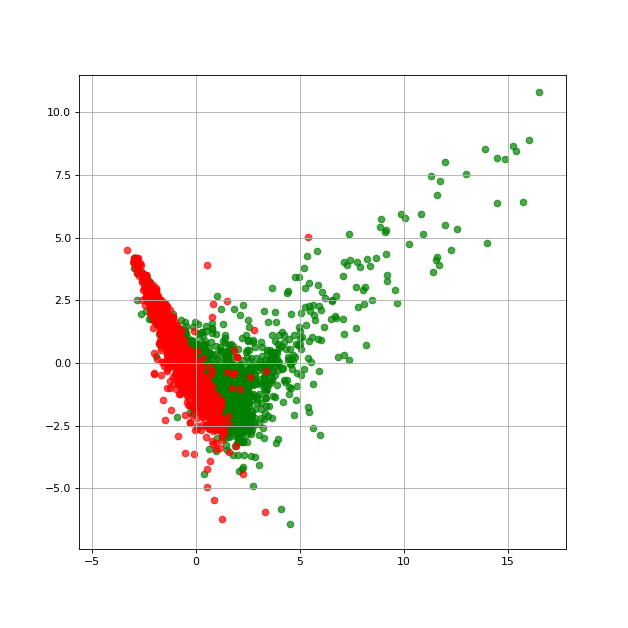

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

def draw_pca(data):
    # PCA analysis only on bool, int64 and float64
    X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
    sc = StandardScaler()
    sc.fit(X_raw)
    
    X = sc.transform(X_raw)    
    y = data['label']

    fig = plt.figure(1, figsize=(8, 8))
    ax = fig.add_subplot(1,1,1)

    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)

    for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
        ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

    ax.grid()
    plt.show()

%matplotlib notebook
draw_pca(twibot20_train)

### Analysis of the annotation
Quality of the annotation using global data

In [94]:

# Account reputation based on Chu et al 
def reputation(user):
    a = abs(user['followers_count'])
    b = abs(user['followers_count']) + abs(user['friends_count'])
    
    return a / b if b != 0 else 0

In [95]:
print('Mean reputation of twibot20_train: {}'.format(twibot20_train.apply(reputation, axis=1).mean()))
print('Mean reputation of twibot20_test : {}\n'.format(twibot20_test.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in twibot20_train: {}'.format(twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of bots in twibot20_test : {}\n'.format(twibot20_test[twibot20_test['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in twibot20_train: {}'.format(twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1).mean()))
print('Mean reputation of users in twibot20_test : {}'.format(twibot20_test[twibot20_test['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of twibot20_train: 0.5674009934923705
Mean reputation of twibot20_test : 0.5790589291082497

Mean reputation of bots in twibot20_train: 0.43975627325969713
Mean reputation of bots in twibot20_test : 0.43376147239652296

Mean reputation of users in twibot20_train: 0.7306822077547602
Mean reputation of users in twibot20_test : 0.7503119167611139


### Random forest model

In [96]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

# PCA analysis only on bool, int64 and float64
X_train = twibot20_train.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_train = twibot20_train['label']

X_test = twibot20_test.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_test = twibot20_test['label']

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8106508875739645


In [97]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

verified                        0.193526
followers_friends_ratio         0.108268
followers_count                 0.081920
listed_count                    0.064424
followers_growth_rate           0.062953
user_age                        0.052975
statuses_count                  0.049964
friends_count                   0.049652
description_length              0.042487
favourites_count                0.042459
friends_growth_rate             0.040889
tweet_freq                      0.039608
favourites_growth_rate          0.036488
name_length                     0.033606
screen_name_length              0.026580
listed_growth_rate              0.021366
num_digits_in_screen_name       0.014262
has_url                         0.009328
geo_enabled                     0.009176
default_profile                 0.006432
profile_background_tile         0.004636
profile_use_background_image    0.003858
num_digits_in_name              0.003296
default_profile_image           0.001845
dtype: float64

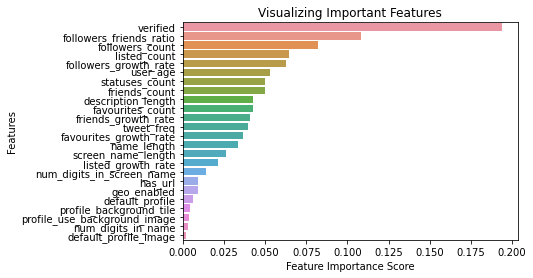

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Cresci-2017 dataset
## Loading the dataset

In [210]:
from datasets import load_cresci17
cresci17_raw = load_cresci17()
cresci17_raw.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,utc_offset,is_translator,follow_request_sent,protected,notifications,contributors_enabled,following,test_set_1,test_set_2,label
count,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,5015.000000,1.0,0.0,78.0,0.0,0.0,0.0,4465.000000,3938.000000,11017.000000
mean,6581.373877,1.126982e+03,656.010075,1492.338568,14.550513,-5901.954138,1.0,NaN,1.0,NaN,NaN,NaN,0.445913,0.242255,0.684669
std,19725.682122,3.069802e+04,3039.022632,6856.574350,304.798431,18906.166175,NaN,NaN,0.0,NaN,NaN,NaN,0.497122,0.428502,0.464669
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-39600.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,46.000000,6.000000e+00,40.000000,0.000000,0.000000,-18000.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,99.000000,1.310000e+02,202.000000,0.000000,1.000000,-14400.000000,1.0,NaN,1.0,NaN,NaN,NaN,0.000000,0.000000,1.000000
75%,4272.000000,5.200000e+02,542.000000,196.000000,5.000000,10800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,0.000000,1.000000
max,399555.000000,2.991573e+06,211890.000000,313954.000000,24348.000000,46800.000000,1.0,NaN,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [211]:
from datasets import remove_cresci17_extra_columns

cresci17 = feature_engineering(remove_useless_api_columns(remove_cresci17_extra_columns(cresci17_raw)))
cresci17.sort_index(axis=1, inplace=True)
cresci17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 1502026416 to 2438666143
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    11017 non-null  datetime64[ns, UTC]
 1   default_profile               11017 non-null  bool               
 2   default_profile_image         11017 non-null  bool               
 3   description                   11017 non-null  object             
 4   description_length            11017 non-null  int64              
 5   favourites_count              11017 non-null  int64              
 6   favourites_growth_rate        11017 non-null  float64            
 7   followers_count               11017 non-null  int64              
 8   followers_friends_ratio       11017 non-null  float64            
 9   followers_growth_rate         11017 non-null  float64            
 10  friends_count       

## PCA analysis

In [25]:
cresci17.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,11017.000000,11017.000000,11017.000000,1.101700e+04,11017.000000,1.101700e+04,11017.000000,1.101700e+04,11017.000000,11017.000000,1.101700e+04,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,1.101700e+04,1.101700e+04
mean,46.488064,1492.338568,0.000014,1.126982e+03,2.294207,7.191193e-06,656.010075,4.743037e-06,0.684669,14.550513,8.830639e-08,12.369338,0.027866,0.367341,11.800490,6581.373877,5.952272e-05,1.289338e+08
std,52.232170,6856.574350,0.000065,3.069802e+04,57.977597,1.402613e-04,3039.022632,1.677761e-05,0.464669,304.798431,1.357688e-06,4.142765,0.356551,1.036392,2.238532,19725.682122,2.000565e-04,7.336029e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,9.134916e+06
25%,0.000000,0.000000,0.000000,6.000000e+00,0.136364,9.267790e-08,40.000000,6.164808e-07,0.000000,0.000000,0.000000e+00,10.000000,0.000000,0.000000,10.000000,46.000000,6.629497e-07,6.477335e+07
50%,26.000000,0.000000,0.000000,1.310000e+02,0.437781,1.016385e-06,202.000000,1.355042e-06,1.000000,1.000000,5.484376e-09,13.000000,0.000000,0.000000,12.000000,99.000000,1.104501e-06,1.159364e+08
75%,96.000000,196.000000,0.000002,5.200000e+02,1.062753,3.250964e-06,542.000000,3.615283e-06,1.000000,5.000000,3.625249e-08,15.000000,0.000000,0.000000,14.000000,4272.000000,3.736641e-05,1.986705e+08
max,298.000000,313954.000000,0.003026,2.991573e+06,4794.333333,1.346266e-02,211890.000000,9.535460e-04,1.000000,24348.000000,1.095707e-04,48.000000,25.000000,11.000000,15.000000,399555.000000,6.509910e-03,2.886269e+08


<IPython.core.display.Javascript object>


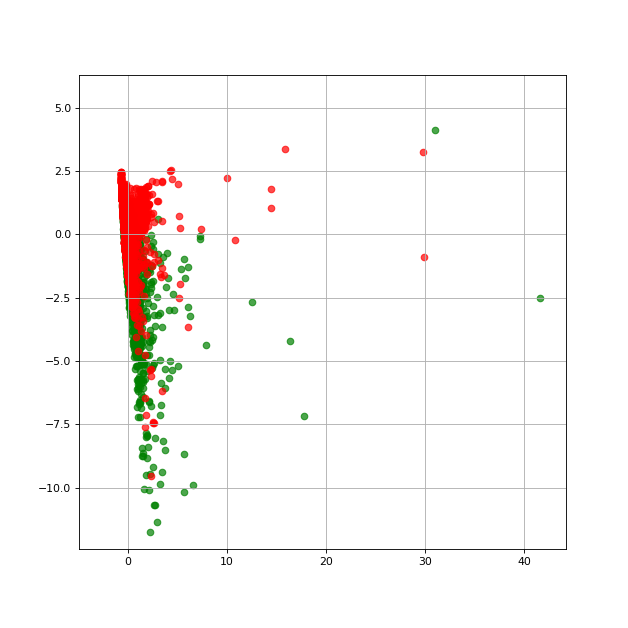

In [93]:
%matplotlib notebook
draw_pca(cresci17)

In [101]:
print('Mean reputation of cresci17 : {}\n'.format(cresci17.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in cresci17 : {}\n'.format(cresci17[cresci17['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in cresci17 : {}'.format(cresci17[cresci17['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of cresci17 : 0.33833945494277506

Mean reputation of bots in cresci17 : 0.262608382793261

Mean reputation of users in cresci17 : 0.5027722347999382


## Random forest model

In [102]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = cresci17.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = cresci17['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

In [103]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9856985698569857


In [104]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

favourites_count                0.364533
favourites_growth_rate          0.149740
tweet_freq                      0.109911
statuses_count                  0.107143
friends_count                   0.038295
followers_friends_ratio         0.037568
geo_enabled                     0.034133
followers_count                 0.031595
user_age                        0.026209
description_length              0.019592
name_length                     0.016269
default_profile                 0.012838
friends_growth_rate             0.012466
listed_count                    0.008642
screen_name_length              0.008055
followers_growth_rate           0.007976
has_url                         0.004520
profile_background_tile         0.003370
num_digits_in_screen_name       0.002496
listed_growth_rate              0.002331
profile_use_background_image    0.001733
num_digits_in_name              0.000302
default_profile_image           0.000215
verified                        0.000069
dtype: float64

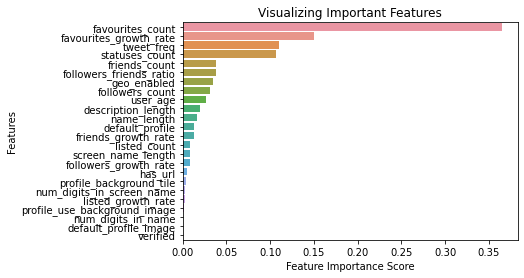

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [106]:
X_test['verified'].value_counts()

False    3634
True        2
Name: verified, dtype: int64

# Midterm-2018 dataset

In [107]:
from datasets import load_midterm18
midterm18_raw = load_midterm18()
midterm18_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   probe_date                    50538 non-null  datetime64[ns, UTC]
 1   screen_name                   50538 non-null  object             
 2   name                          50538 non-null  object             
 3   description                   50538 non-null  object             
 4   created_at                    50538 non-null  datetime64[ns, UTC]
 5   url                           7473 non-null   object             
 6   lang                          50538 non-null  object             
 7   protected                     46995 non-null  float64            
 8   verified                      50538 non-null  bool               
 9   geo_enabled                   50538 non-null  bool               
 10  profile_use

In [108]:
midterm18_raw.sample(3)

,probe_date,screen_name,name,description,created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,label
id,,,,,,,,,,,,,,,,,,,
760409,2018-11-06 14:16:04+00:00,djcoffman,D.J. Coffman,"✏️ Cartoonist, Stoic, awesome human being. Chi...",2007-02-09 09:10:25+00:00,http://secretforces.net,en,NaN,False,True,True,False,2365,421,183,3588,15776,1059887156041342976,0
1057281996299386880,2018-10-31 16:27:58+00:00,lolita07644589,lolita,,2018-10-30 14:44:06+00:00,None,en,0.0,False,False,True,True,0,0,0,0,32,1057670525101752320,1
1070694142634676224,2018-12-07 15:19:18+00:00,Stylesh67342785,Style shop,,2018-12-06 14:59:10+00:00,None,en,0.0,False,False,True,True,8,70,0,61,15,1071061595407564800,1


In [109]:
from datasets import remove_midterm18_extra_columns

midterm18 = feature_engineering(remove_useless_api_columns(remove_midterm18_extra_columns(midterm18_raw)))
midterm18.sort_index(axis=1, inplace=True)
midterm18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50538 entries, 4107317134 to 1078964200234536960
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    50538 non-null  datetime64[ns, UTC]
 1   default_profile               50538 non-null  bool               
 2   description                   50538 non-null  object             
 3   description_length            50538 non-null  int64              
 4   favourites_count              50538 non-null  int64              
 5   favourites_growth_rate        50538 non-null  float64            
 6   followers_count               50538 non-null  int64              
 7   followers_friends_ratio       50538 non-null  float64            
 8   followers_growth_rate         50538 non-null  float64            
 9   friends_count                 50538 non-null  int64              
 10  friends_gro

In [110]:
midterm18.describe()

,description_length,favourites_count,favourites_growth_rate,followers_count,followers_friends_ratio,followers_growth_rate,friends_count,friends_growth_rate,label,listed_count,listed_growth_rate,name_length,num_digits_in_name,num_digits_in_screen_name,screen_name_length,statuses_count,tweet_freq,user_age
count,50538.000000,50538.000000,50538.000000,5.053800e+04,50538.000000,5.053800e+04,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,5.053800e+04,5.053800e+04
mean,34.613697,2314.836855,0.000688,2.646619e+03,3.802432,1.450691e-04,291.848649,0.002463,0.839883,15.767264,0.000002,11.064427,0.239463,3.274447,12.823281,2450.863944,3.290288e-03,3.536830e+07
std,50.807892,12672.635307,0.005323,2.322714e+05,181.025669,1.178014e-03,2671.673946,0.014808,0.366718,449.017746,0.000032,5.351100,1.300856,3.347128,2.455673,13770.228640,1.216894e-02,8.189664e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.646877e-09,2.100000e+01
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,11.000000,8.000000,2.192419e-05,1.909625e+04
50%,0.000000,0.000000,0.000000,1.000000e+00,0.000000,4.003104e-08,9.000000,0.000002,1.000000,0.000000,0.000000,11.000000,0.000000,2.000000,14.000000,30.000000,1.631043e-04,2.480490e+05
75%,57.000000,75.000000,0.000064,1.600000e+01,0.189262,9.245883e-06,141.000000,0.000136,1.000000,0.000000,0.000000,14.000000,0.000000,8.000000,15.000000,147.000000,1.910641e-03,1.630540e+07
max,197.000000,463821.000000,0.255042,5.086590e+07,26997.250000,1.564589e-01,298234.000000,0.685714,1.000000,67930.000000,0.002591,50.000000,47.000000,14.000000,15.000000,599307.000000,4.245283e-01,3.752213e+08


We can see that some features (profile_background_tile, location, default_profile_image) are missing from the dataset compared to TwiBot-20 and Cresci-17. This will have to be taken into consideration when mixing datasets.

### PCA analysis

<IPython.core.display.Javascript object>


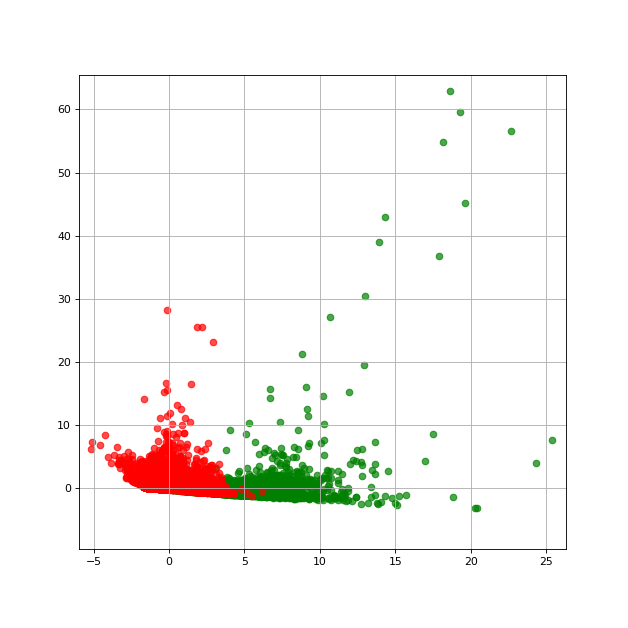

In [91]:
%matplotlib notebook
draw_pca(midterm18)

In [111]:
print('Mean reputation of midterm18 : {}\n'.format(midterm18.apply(reputation, axis=1).mean()))

print('Mean reputation of bots in midterm18 : {}\n'.format(midterm18[midterm18['label'] == 1].apply(reputation, axis=1).mean()))

print('Mean reputation of users in midterm18 : {}'.format(midterm18[midterm18['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of midterm18 : 0.19110602694413062

Mean reputation of bots in midterm18 : 0.14233387711910275

Mean reputation of users in midterm18 : 0.4469368069086799


## Random forest model

In [112]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
X = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y = midterm18['label']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

In [113]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.values, y_train.values)

y_pred=clf.predict(X_test.values)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9938841587720351


In [114]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

user_age                        0.226399
statuses_count                  0.152862
listed_count                    0.124767
favourites_count                0.114276
followers_count                 0.083451
default_profile                 0.050622
geo_enabled                     0.047190
followers_friends_ratio         0.043524
friends_growth_rate             0.036611
friends_count                   0.027498
tweet_freq                      0.025693
followers_growth_rate           0.019433
favourites_growth_rate          0.012479
description_length              0.012104
num_digits_in_screen_name       0.005974
has_url                         0.004087
screen_name_length              0.003806
name_length                     0.003077
listed_growth_rate              0.002495
profile_use_background_image    0.002079
num_digits_in_name              0.000893
verified                        0.000679
dtype: float64

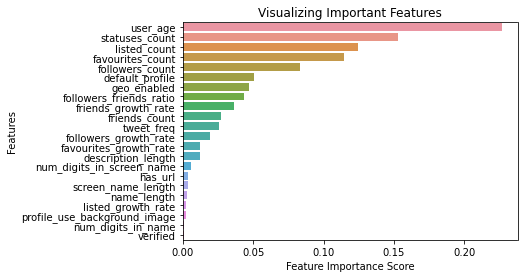

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Mixing datasets
### Generalization capabilities

First, let's see whether the models trained on a dataset works on other datasets.

In [248]:
twibot20_bots = twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1)
twibot20_users = twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1)

cresci17_bots = cresci17[cresci17['label'] == 1].apply(reputation, axis=1)
cresci17_users = cresci17[cresci17['label'] == 0].apply(reputation, axis=1)

midterm18_bots = midterm18[midterm18['label'] == 1].apply(reputation, axis=1)
midterm18_users = midterm18[midterm18['label'] == 0].apply(reputation, axis=1)

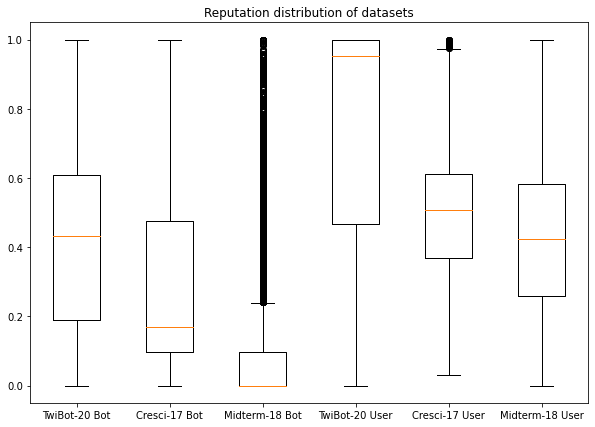

In [264]:
data = [twibot20_bots.values, cresci17_bots.values, midterm18_bots.values, twibot20_users.values, cresci17_users.values, midterm18_users.values]
labels = ['TwiBot-20 Bot', 'Cresci-17 Bot', 'Midterm-18 Bot', 'TwiBot-20 User', 'Cresci-17 User', 'Midterm-18 User']

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Reputation distribution of datasets')
ax.boxplot(data)
ax.set_xticklabels(labels);

In [37]:
print('Mean reputation of twibot20 : {}'.format(twibot20_train.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in twibot20 : {}'.format(twibot20_train[twibot20_train['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in twibot20 : {}\n'.format(twibot20_train[twibot20_train['label'] == 0].apply(reputation, axis=1).mean()))

print('Mean reputation of cresci17 : {}'.format(cresci17.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in cresci17 : {}'.format(cresci17[cresci17['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in cresci17 : {}\n'.format(cresci17[cresci17['label'] == 0].apply(reputation, axis=1).mean()))

print('Mean reputation of midterm18 : {}'.format(midterm18.apply(reputation, axis=1).mean()))
print('Mean reputation of bots in midterm18 : {}'.format(midterm18[midterm18['label'] == 1].apply(reputation, axis=1).mean()))
print('Mean reputation of users in midterm18 : {}\n'.format(midterm18[midterm18['label'] == 0].apply(reputation, axis=1).mean()))

Mean reputation of twibot20 : 0.5674009934923705
Mean reputation of bots in twibot20 : 0.43975627325969713
Mean reputation of users in twibot20 : 0.7306822077547602

Mean reputation of cresci17 : 0.33833945494277506
Mean reputation of bots in cresci17 : 0.262608382793261
Mean reputation of users in cresci17 : 0.5027722347999382

Mean reputation of midterm18 : 0.19110602694413062
Mean reputation of bots in midterm18 : 0.14233387711910275
Mean reputation of users in midterm18 : 0.4469368069086799



<IPython.core.display.Javascript object>


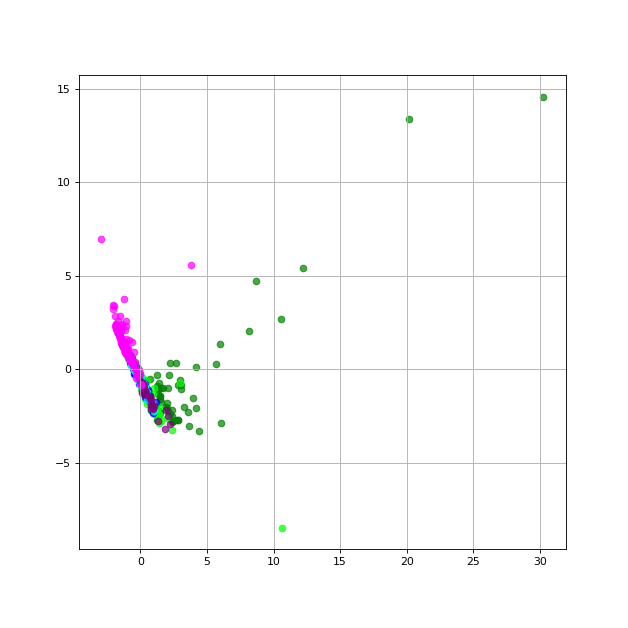

In [128]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

%matplotlib notebook

twibot20_pca = twibot20_train.sample(200).copy()
cresci17_pca = cresci17.sample(200).copy()
midterm18_pca = midterm18.sample(200).copy()

twibot20_pca['label'] = twibot20_pca['label'].apply(lambda lbl: ('twibot20', lbl))
cresci17_pca['label'] = cresci17_pca['label'].apply(lambda lbl: ('cresci17', lbl))
midterm18_pca['label'] = midterm18_pca['label'].apply(lambda lbl: ('midterm18', lbl))

data = pd.concat([twibot20_pca, cresci17_pca, midterm18_pca])
X_raw = data.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])

sc = StandardScaler()
sc.fit(X_raw)
X = sc.transform(X_raw)
y = data['label']

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

colors = [(("twibot20", 0), 'green'), (("twibot20", 1), 'lime'),
          (("cresci17", 0), 'blue'), (("cresci17", 1), 'cyan'),
          (("midterm18", 0), 'purple'), (("midterm18", 1), 'magenta')]
for label, c in colors:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()


twibot20_pca = twibot20_pca[0:0]
cresci17_pca = cresci17_pca[0:0]
midterm18_pca = midterm18_pca[0:0]

In [129]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, test
# Drop columns missing from midterm18
X_twibot20 = twibot20_train.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_twibot20 = twibot20_train['label']
X_twibot20_train, X_twibot20_test, y_twibot20_train, y_twibot20_test = train_test_split(X_twibot20, y_twibot20,test_size=0.33, random_state=80)

X_cresci17 = cresci17.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_cresci17 = cresci17['label']
X_cresci17_train, X_cresci17_test, y_cresci17_train, y_cresci17_test = train_test_split(X_cresci17, y_cresci17,test_size=0.33, random_state=80)

X_midterm18 = midterm18.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_midterm18 = midterm18['label']
X_midterm18_train, X_midterm18_test, y_midterm18_train, y_midterm18_test = train_test_split(X_midterm18, y_midterm18,test_size=0.33, random_state=80)

#### Model trained using TwiBot-20

In [146]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_train, y_twibot20_train)

y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)
y_midterm18_pred=clf.predict(X_midterm18_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of twibot20   :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print("                     f1:", metrics.f1_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17   :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print("                     f1:", metrics.f1_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))
print("Accuracy on midterm18  :", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print("                     f1:", metrics.f1_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))

"""
              pred
            1       0
          -----   -----
       1 |  TP  |  FP
truth     -----   -----
       0 |  FN  |  TN
""";

Accuracy of twibot20   : 0.8122254758418741
                     f1: 0.8532188841201717
[[1491   58]
 [ 455  728]]
Accuracy on cresci17   : 0.6958195819581958
                     f1: 0.8184504267892317
[[2493    0]
 [1106   37]]
Accuracy on midterm18  : 0.7955989926849742
                     f1: 0.8847648987594225
[[13087   971]
 [ 2438   182]]


In [147]:
y_twibot20_test.sum()

1549

#### Model trained using Cresci-17

In [136]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cresci17_train, y_cresci17_train)

y_cresci17_pred=clf.predict(X_cresci17_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_midterm18_pred=clf.predict(X_midterm18_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))

Accuracy of cresci17 : 0.9854235423542355
[[1122   21]
 [  32 2461]]
Accuracy on twibot20 : 0.4513177159590044
[[1108   75]
 [1424  125]]
Accuracy on midterm18: 0.7042810888595755
[[2593   27]
 [4905 9153]]


#### Model trained using Midterm-18

In [135]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_midterm18_train, y_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.9938841587720351
[[ 2563    57]
 [   45 14013]]
Accuracy on twibot20 : 0.44875549048316254
[[1116   67]
 [1439  110]]
Accuracy on cresci17 : 0.323982398239824
[[1139    4]
 [2454   39]]


In [178]:
# Use only 5000 sample of each
from sklearn.model_selection import train_test_split

rand = 346
# Split the dataset into train, test
twibot20_sample = twibot20_train.sample(8000, random_state=rand)
cresci17_sample = cresci17.sample(3000, random_state=rand)
midterm18_sample = midterm18.sample(5000, random_state=rand)

# Drop columns missing from midterm18
X_twibot20 = twibot20_sample.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_twibot20 = twibot20_sample['label']
X_twibot20_train, X_twibot20_test, y_twibot20_train, y_twibot20_test = train_test_split(X_twibot20, y_twibot20,test_size=0.33, random_state=80)

X_cresci17 = cresci17_sample.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_cresci17 = cresci17_sample['label']
X_cresci17_train, X_cresci17_test, y_cresci17_train, y_cresci17_test = train_test_split(X_cresci17, y_cresci17,test_size=0.33, random_state=80)

X_midterm18 = midterm18_sample.drop('label', axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_midterm18 = midterm18_sample['label']
X_midterm18_train, X_midterm18_test, y_midterm18_train, y_midterm18_test = train_test_split(X_midterm18, y_midterm18,test_size=0.33, random_state=80)

In [212]:
# Cresci + midterm dataset
X_cresci17_midterm18_train = pd.concat([X_cresci17_train, X_midterm18_train])
y_cresci17_midterm18_train = pd.concat([y_cresci17_train, y_midterm18_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_cresci17_midterm18_train, y_cresci17_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.9927272727272727
[[1390    2]
 [  10  248]]
Accuracy on twibot20 : 0.49886363636363634
[[ 268 1196]
 [ 127 1049]]
Accuracy on cresci17 : 0.9828282828282828
[[657   6]
 [ 11 316]]


In [213]:
# Twibot + cresci dataset
X_twibot20_cresci17_train = pd.concat([X_twibot20_train, X_cresci17_train ])
y_twibot20_cresci17_train = pd.concat([y_twibot20_train, y_cresci17_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_cresci17_train, y_twibot20_cresci17_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.8181818181818182
[[1260  132]
 [ 168   90]]
Accuracy on twibot20 : 0.8026515151515151
[[1363  101]
 [ 420  756]]
Accuracy on cresci17 : 0.9303030303030303
[[659   4]
 [ 65 262]]


In [214]:
# Twibot + midterm dataset
X_twibot20_midterm18_train = pd.concat([X_twibot20_train, X_cresci17_train ])
y_twibot20_midterm18_train = pd.concat([y_twibot20_train, y_cresci17_train])

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_twibot20_midterm18_train, y_twibot20_midterm18_train)

y_midterm18_pred=clf.predict(X_midterm18_test)
y_twibot20_pred=clf.predict(X_twibot20_test)
y_cresci17_pred=clf.predict(X_cresci17_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy of midterm18:", metrics.accuracy_score(y_midterm18_test, y_midterm18_pred))
print(metrics.confusion_matrix(y_midterm18_test, y_midterm18_pred, labels=[1, 0]))
print("Accuracy on twibot20 :", metrics.accuracy_score(y_twibot20_test, y_twibot20_pred))
print(metrics.confusion_matrix(y_twibot20_test, y_twibot20_pred, labels=[1, 0]))
print("Accuracy on cresci17 :", metrics.accuracy_score(y_cresci17_test, y_cresci17_pred))
print(metrics.confusion_matrix(y_cresci17_test, y_cresci17_pred, labels=[1, 0]))

Accuracy of midterm18: 0.8296969696969697
[[1277  115]
 [ 166   92]]
Accuracy on twibot20 : 0.8
[[1357  107]
 [ 421  755]]
Accuracy on cresci17 : 0.9363636363636364
[[659   4]
 [ 59 268]]


In [225]:
X_verified19 = verified19.drop(['label', 'location', 'profile_background_tile', 'default_profile_image'], axis=1).select_dtypes(include=['int64', 'float64', 'bool'])
y_verified19 = verified19['label']

clf.predict(X_verified19).sum()

16

In [229]:
# Extract the model
import joblib
joblib.dump(clf, 'rf-model.pkl')

['rf-model.pkl']

In [230]:
# Restore the model
import joblib
clf_copy = joblib.load('rf-model.pkl')
clf_copy.predict(X_verified19).sum()

16

In [218]:
# Applying to a human dataset
def load_verified_2019():
    file_users = "../verified-2019/verified-2019_tweets.json"
    file_bots = "../verified-2019/verified-2019.tsv"

    raw = pd.read_json(file_users)
    labels = pd.read_csv(file_bots, names=['id', 'label'], sep='\t')    

    profiles = pd.json_normalize(raw['user'])
    profiles.drop(['id_str', 
                   'profile_background_image_url_https', 
                   'profile_image_url_https'], axis=1, inplace=True)
    profiles['label'] = 0
    profiles['probe_date'] = raw['created_at']

    # Convert columns to integer
    profiles[['id', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'label']] = profiles[['id', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'label']].apply(pd.to_numeric)
    profiles.set_index('id', inplace=True)

    # Convert strings to dates
    profiles['created_at'] = profiles['created_at'].apply(pd.to_datetime, utc=True)
    profiles['probe_date'] = profiles['probe_date'].apply(pd.to_datetime, utc=True)

    # Replace "True ", "False ", "None " by python types
    profiles.replace({'True ': True, 'False ': False, 'None ': None}, inplace=True)

    return profiles

verified19 = feature_engineering(remove_useless_api_columns(load_verified_2019()))
verified19.drop(['notifications', 'following', 'profile_banner_url', 'translator_type', 'entities.url.urls', 'entities.description.urls', 'follow_request_sent'], axis=1, inplace=True)
verified19.sort_index(axis=1, inplace=True)
verified19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 31098240 to 19084210
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   created_at                    1987 non-null   datetime64[ns, UTC]
 1   default_profile               1987 non-null   bool               
 2   default_profile_image         1987 non-null   bool               
 3   description                   1987 non-null   object             
 4   description_length            1987 non-null   int64              
 5   favourites_count              1987 non-null   int64              
 6   favourites_growth_rate        1987 non-null   float64            
 7   followers_count               1987 non-null   int64              
 8   followers_friends_ratio       1987 non-null   float64            
 9   followers_growth_rate         1987 non-null   float64            
 10  friends_count            

In [196]:
profiles

,created_at,user
0,2019-06-05 20:09:15+00:00,"{'id': 31098240, 'id_str': '31098240', 'name':..."
1,2019-06-05 22:40:04+00:00,"{'id': 6892002, 'id_str': '6892002', 'name': '..."
2,2019-06-04 22:04:21+00:00,"{'id': 20083388, 'id_str': '20083388', 'name':..."
3,2019-06-05 10:58:25+00:00,"{'id': 385587235, 'id_str': '385587235', 'name..."
4,2019-06-05 18:21:32+00:00,"{'id': 51240839, 'id_str': '51240839', 'name':..."
...,...,...
1982,2019-06-05 12:26:47+00:00,"{'id': 76235237, 'id_str': '76235237', 'name':..."
1983,2019-06-05 22:07:56+00:00,"{'id': 2159329092, 'id_str': '2159329092', 'na..."
1984,2019-06-05 14:16:01+00:00,"{'id': 25527618, 'id_str': '25527618', 'name':..."
1985,2019-06-05 16:33:33+00:00,"{'id': 43654274, 'id_str': '43654274', 'name':..."


In [193]:
profiles['user'][0]

{'id': 31098240,
 'id_str': '31098240',
 'name': 'Netwerk24',
 'screen_name': 'Netwerk24',
 'location': 'Johannesburg',
 'description': 'Al die nuus, politiek, sport, geldsake & vermaak tot menings & diepteontledings, #AllesOpEenPlek & in Afrikaans! Volg @Netwerk24Sport vir top-sportnuus.',
 'url': 'https://t.co/Y0QuSqwwOL',
 'entities': {'url': {'urls': [{'url': 'https://t.co/Y0QuSqwwOL',
     'expanded_url': 'http://www.netwerk24.com',
     'display_url': 'netwerk24.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 188419,
 'friends_count': 857,
 'listed_count': 432,
 'created_at': 'Tue Apr 14 10:57:46 +0000 2009',
 'favourites_count': 628,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': True,
 'statuses_count': 117922,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '9AE4E8',
 'profile_background_image_url': 'htt

In [159]:
X_cresci17_midterm18_train.columns.values

array(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'default_profile',
       'geo_enabled', 'profile_use_background_image', 'verified',
       'user_age', 'tweet_freq', 'followers_growth_rate',
       'friends_growth_rate', 'favourites_growth_rate',
       'listed_growth_rate', 'followers_friends_ratio', 'name_length',
       'screen_name_length', 'description_length', 'num_digits_in_name',
       'num_digits_in_screen_name', 'has_url'], dtype=object)

In [166]:
np.sort(X_cresci17_train.columns.values) == np.sort(X_cresci17_midterm18_train.columns.values)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [154]:
clf.predict(twibot20_train[twibot20_train['name'] == 'OConnellFanClub '].values)

array([0])

# Random code

In [31]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

Y_train = train_features['label']
X_train = train_features.drop(['label'], axis=1)

Y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)
# Split dataset into training set and test set

X_test.info()

NameError: name 'train_features' is not defined

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values,Y_train.values)

y_pred=clf.predict(X_test.values)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
profiles = [profile for profile in train_raw_data[train_raw_data["label"] == 0].sample(n=30)["profile"]]
for profile in profiles:
    print("https://twitter.com/"+str(profile['screen_name'])+"\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")

ax.set_xlim3d(-10,20)
ax.set_zlim3d(-10,10)

fig.add_axes(ax)

plt.show()

In [ ]:
%matplotlib notebook

import pandas as pd
import numpy as np

files_genuine = ["../cresci-2017.csv/genuine_accounts.csv/users.csv"]
files_bots = ["../cresci-2017.csv/traditional_spambots_1.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_2.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_3.csv/users.csv",
              "../cresci-2017.csv/traditional_spambots_4.csv/users.csv",
              "../cresci-2017.csv/social_spambots_1.csv/users.csv",
              "../cresci-2017.csv/social_spambots_2.csv/users.csv",
              "../cresci-2017.csv/social_spambots_3.csv/users.csv"]

train_raw_data_genuine = pd.concat((pd.read_csv(f) for f in files_genuine))
train_raw_data_genuine['label'] = 0

train_raw_data_bots = pd.concat((pd.read_csv(f) for f in files_bots))
train_raw_data_bots['label'] = 1

train_raw_data = pd.concat((train_raw_data_genuine, train_raw_data_bots))
train_raw_data = train_raw_data.rename(columns={})

train_profile = train_raw_data

train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = train_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

train_profile.set_index('id', inplace=True)

#Douteux
#train_profile = train_profile.replace([0], 1)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms", utc=True)

train_profile.created_at = train_profile.created_at.apply(date_converter)

train_labels = train_raw_data["label"].values
train_dict = {"statuses_count":train_profile.statuses_count, 
                "followers_count":train_profile.followers_count, 
                "friends_count":train_profile.friends_count, 
                "favourites_count":train_profile.favourites_count, 
                "listed_count":train_profile.listed_count, 
                "default_profile":train_profile.default_profile,
                "profile_use_background_image":train_profile.profile_use_background_image,
                "verified":train_profile.verified,
                "user_age":(pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days,
                "tweet_freq": np.nan_to_num(train_profile.statuses_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_growth_rate": np.nan_to_num(train_profile.followers_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "friends_growth_rate" : np.nan_to_num(train_profile.friends_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "favourites_growth_rate" : np.nan_to_num(train_profile.favourites_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "listed_growth_rate" : np.nan_to_num(train_profile.listed_count / (pd.to_datetime(train_profile.updated, utc=True) - pd.to_datetime(train_profile.created_at)).dt.days),
                "followers_friends_ratio" : np.nan_to_num(train_profile.followers_count / train_profile.friends_count, posinf=0.0),
                "screen_name_length": train_profile.screen_name.str.len(),
                "num_digits_in_screen_name": train_profile.screen_name.str.count('\d'),
                "name_length": train_profile.name.str.len(),
                "num_digits_in_name": train_profile.name.str.count('\d'),
                "description_length": train_profile.description.str.len(),
                 "label":train_labels
               }
train_features2 = pd.DataFrame(data=train_dict)
train_features2 = train_features2.replace({'True ': True, 'False ': False})
train_features2 = train_features2.fillna(0)
train_features2.default_profile = train_features2.default_profile.astype(bool)
train_features2.verified = train_features2.verified.astype(bool)
train_features2.profile_use_background_image = train_features2.profile_use_background_image.astype(bool)

train_features2.describe()

In [ ]:
train_profile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = train_features2.drop(['label'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = train_features2['label']

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=c, alpha=0.7)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
#ax.scatter(X[y , 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="c")


fig.add_axes(ax)
ax.set_xlim3d(0,50)
ax.set_ylim3d(-10,30)
ax.set_zlim3d(-10,10)


plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = train_features2['label']
X = train_features2.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
indexes = X_test[y_pred == 1].index
profiles = test_profile.loc[test_profile.index.isin(indexes)]
for i, profile in profiles.iterrows():
    print("https://twitter.com/"+profile.screen_name+"\n")

In [ ]:
profiles.values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [421]:
%matplotlib notebook

import pandas as pd
import numpy as np

file_users = "../midterm-2018_processed_user_objects.json"
file_bots = "../midterm-2018.tsv"

midterm2018_profile = pd.read_json(file_users)
midterm2018_labels = pd.read_csv(file_bots, names=['id', 'label'], sep='\t')

midterm2018_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]] = midterm2018_profile[["statuses_count","followers_count","friends_count","favourites_count","listed_count"]].apply(pd.to_numeric, errors='coerce', axis=1)

midterm2018_profile = midterm2018_profile.rename(columns={'user_id': 'id'})

midterm2018_profile.set_index('id', inplace=True)
midterm2018_labels.set_index('id', inplace=True)

def date_converter(dt):
    try:
        return pd.to_datetime(dt)
    except:
        return pd.to_datetime("1185440851000", unit="ms")

midterm2018_profile.probe_timestamp = midterm2018_profile.probe_timestamp.apply(date_converter)
midterm2018_labels.label = midterm2018_labels.label.apply(lambda l: 1 if l == 'bot' else 0)

In [422]:
midterm2018_dict = {"statuses_count":midterm2018_profile.statuses_count, 
                "followers_count":midterm2018_profile.followers_count, 
                "friends_count":midterm2018_profile.friends_count, 
                "favourites_count":midterm2018_profile.favourites_count, 
                "listed_count":midterm2018_profile.listed_count, 
                "default_profile":midterm2018_profile.default_profile,
                "profile_use_background_image":midterm2018_profile.profile_use_background_image,
                "verified":midterm2018_profile.verified,
                "user_age":(pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days,
                "tweet_freq": np.nan_to_num(midterm2018_profile.statuses_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "followers_growth_rate": np.nan_to_num(midterm2018_profile.followers_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "friends_growth_rate" : np.nan_to_num(midterm2018_profile.friends_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "favourites_growth_rate" : np.nan_to_num(midterm2018_profile.favourites_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "listed_growth_rate" : np.nan_to_num(midterm2018_profile.listed_count / (pd.to_datetime(midterm2018_profile.probe_timestamp) - pd.to_datetime(midterm2018_profile.user_created_at)).dt.days, posinf=0.0),
                "followers_friends_ratio" : np.nan_to_num(midterm2018_profile.followers_count / midterm2018_profile.friends_count, posinf=0.0),
                "screen_name_length": midterm2018_profile.screen_name.str.len(),
                "num_digits_in_screen_name": midterm2018_profile.screen_name.str.count('\d'),
                "name_length": midterm2018_profile.name.str.len(),
                "num_digits_in_name": midterm2018_profile.name.str.count('\d'),
                "description_length": midterm2018_profile.description.str.len(),
               }

midterm2018_features = pd.DataFrame(data=midterm2018_dict)
midterm2018_features = pd.concat([midterm2018_features, midterm2018_labels], axis=1)
midterm2018_features = midterm2018_features.fillna(0)

midterm2018_features.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,user_age,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
count,50538.000000,5.053800e+04,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000,50538.000000
mean,2450.863944,2.646619e+03,291.848649,2314.836855,15.767264,408.964245,15.351099,4.507144,12.847318,9.774962,0.020671,3.802432,12.823281,3.274447,11.064427,0.239463,34.613697,0.839883
std,13770.228640,2.322714e+05,2671.673946,12672.635307,449.017746,947.806672,51.733556,74.937591,66.552859,49.899398,0.209413,181.025669,2.455673,3.347128,5.351100,1.300856,50.807892,0.366718
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,7.000000,0.000000,0.000000,1.000000
50%,30.000000,1.000000e+00,9.000000,0.000000,0.000000,2.000000,0.545476,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2.000000,11.000000,0.000000,0.000000,1.000000
75%,147.000000,1.600000e+01,141.000000,75.000000,0.000000,188.000000,8.333333,0.222222,0.719968,1.445764,0.000000,0.189262,15.000000,8.000000,14.000000,0.000000,57.000000,1.000000
max,599307.000000,5.086590e+07,298234.000000,463821.000000,67930.000000,4342.000000,2461.000000,13520.972355,2236.000000,1829.000000,18.056885,26997.250000,15.000000,14.000000,50.000000,47.000000,197.000000,1.000000


In [423]:
midterm2018_features.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
4107317134,67025,481,870,6542,26,False,False,False,1098,61.042805,...,0.792350,5.958106,0.023679,0.552874,13,2,8,0,144.0,0
4858296837,158,202,712,1515,5,False,False,False,1012,0.156126,...,0.703557,1.497036,0.004941,0.283708,12,0,17,0,104.0,0
232631847,4029,278,342,4780,4,True,True,False,2867,1.405302,...,0.119288,1.667248,0.001395,0.812865,10,0,6,0,146.0,0
16700555,53427,29546,384,143163,402,False,True,True,3677,14.530052,...,0.104433,38.934729,0.109328,76.942708,11,0,12,0,157.0,0
334443152,1315,95,668,1178,1,True,True,False,2673,0.491957,...,0.249906,0.440703,0.000374,0.142216,8,4,1,0,0.0,0


<IPython.core.display.Javascript object>


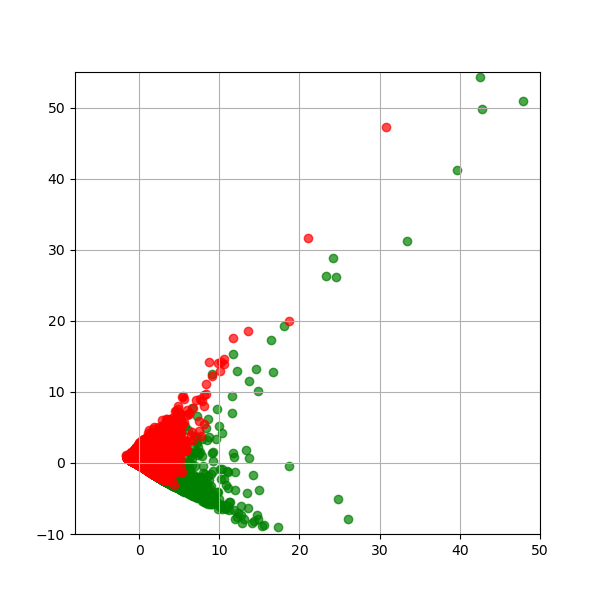

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

np.random.seed(5)

X = midterm2018_features.drop(['label', 'verified'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

y = midterm2018_features['label']

fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

for name, label, c in [("Non-bot", 0, 'g'), ("Bot", 1, 'r')]:
    ax.scatter(X[y == label, 0], X[y == label, 1], c=c, alpha=0.7)

ax.grid()
plt.xlim(-8, 50)
plt.ylim(-10,55)
plt.show()

In [431]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = midterm2018_features['label']
X = midterm2018_features.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16678 entries, 1053466183326949376 to 1047230030152171520
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                16678 non-null  int64  
 1   followers_count               16678 non-null  int64  
 2   friends_count                 16678 non-null  int64  
 3   favourites_count              16678 non-null  int64  
 4   listed_count                  16678 non-null  int64  
 5   default_profile               16678 non-null  bool   
 6   profile_use_background_image  16678 non-null  bool   
 7   verified                      16678 non-null  bool   
 8   user_age                      16678 non-null  int64  
 9   tweet_freq                    16678 non-null  float64
 10  followers_growth_rate         16678 non-null  float64
 11  friends_growth_rate           16678 non-null  float64
 12  favourites_growth_rate      

In [432]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.9934044849502338


user_age                        0.296640
favourites_count                0.135184
statuses_count                  0.119307
listed_growth_rate              0.088541
listed_count                    0.076459
followers_count                 0.062790
default_profile                 0.043166
followers_friends_ratio         0.039266
favourites_growth_rate          0.029766
followers_growth_rate           0.028469
friends_growth_rate             0.023900
tweet_freq                      0.020747
friends_count                   0.015459
description_length              0.007242
num_digits_in_screen_name       0.004325
screen_name_length              0.003392
name_length                     0.003361
profile_use_background_image    0.001275
num_digits_in_name              0.000627
verified                        0.000084
dtype: float64

In [440]:
y_test = test_features['label']
X_test = test_features.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.4885883347421809


favourites_count                0.353044
favourites_growth_rate          0.250768
tweet_freq                      0.099728
statuses_count                  0.086597
followers_count                 0.031619
friends_count                   0.030293
followers_growth_rate           0.028127
followers_friends_ratio         0.024978
user_age                        0.023411
friends_growth_rate             0.016031
description_length              0.015853
listed_growth_rate              0.010512
name_length                     0.008348
default_profile                 0.005886
listed_count                    0.005715
screen_name_length              0.005131
profile_use_background_image    0.002216
num_digits_in_screen_name       0.001503
num_digits_in_name              0.000163
verified                        0.000076
dtype: float64

In [466]:
train_features2

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
1502026416,2177,208,332,265,1,False,False,False,1008,2.159722,...,0.329365,0.262897,0.000992,0.626506,8,4,15.0,0.0,21.0,0
2492782375,2660,330,485,3972,5,True,True,False,672,3.958333,...,0.721726,5.910714,0.007440,0.680412,8,4,5.0,0.0,48.0,0
293212315,1254,166,177,1185,0,False,True,False,1776,0.706081,...,0.099662,0.667230,0.000000,0.937853,9,2,8.0,0.0,34.0,0
191839658,202968,2248,981,60304,101,False,True,False,2006,101.180459,...,0.489033,30.061815,0.050349,2.291539,11,0,17.0,0.0,58.0,0
3020965143,82,21,79,5,0,True,True,False,403,0.203474,...,0.196030,0.012407,0.000000,0.265823,15,8,8.0,0.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396095423,106,4,23,0,0,False,True,False,728,0.145604,...,0.031593,0.000000,0.000000,0.173913,14,0,16.0,0.0,142.0,1
2396099064,173,2,20,0,0,False,True,False,728,0.237637,...,0.027473,0.000000,0.000000,0.100000,13,0,15.0,0.0,142.0,1
2429375022,137,29,124,0,0,False,True,False,709,0.193230,...,0.174894,0.000000,0.000000,0.233871,15,0,17.0,0.0,142.0,1


In [467]:
midterm2018_features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
4107317134,67025,481,870,6542,26,False,False,False,1098,61.042805,...,0.792350,5.958106,0.023679,0.552874,13,2,8,0,144.0,0
4858296837,158,202,712,1515,5,False,False,False,1012,0.156126,...,0.703557,1.497036,0.004941,0.283708,12,0,17,0,104.0,0
232631847,4029,278,342,4780,4,True,True,False,2867,1.405302,...,0.119288,1.667248,0.001395,0.812865,10,0,6,0,146.0,0
16700555,53427,29546,384,143163,402,False,True,True,3677,14.530052,...,0.104433,38.934729,0.109328,76.942708,11,0,12,0,157.0,0
334443152,1315,95,668,1178,1,True,True,False,2673,0.491957,...,0.249906,0.440703,0.000374,0.142216,8,4,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078921538739544064,5,0,4,3,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,13,1,12,0,57.0,1
1078923723019874304,280,0,0,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,15,8,10,0,42.0,1
1078937076878503936,1,0,0,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,15,8,10,0,130.0,1


In [469]:
midterm2018_cresci17_features = pd.concat([midterm2018_features.sample(n = 10000), train_features2.sample(n = 10000)])
midterm2018_cresci17_features

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
430956476,7744,1778,1110,8841,58,False,True,False,2526,3.065717,...,0.439430,3.500000,0.022961,1.601802,9,0,16.0,0.0,153.0,0
1056289109122170881,204,1,64,1,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.015625,14,0,12.0,0.0,112.0,1
1059673974626500609,8,0,1,5,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,9,2,14.0,0.0,28.0,1
1057074808284835840,298,3,499,107,0,True,True,False,4,74.500000,...,124.750000,26.750000,0.000000,0.006012,8,0,15.0,0.0,0.0,1
1056784994310340608,77,0,0,0,0,True,True,False,1,77.000000,...,0.000000,0.000000,0.000000,0.000000,12,8,4.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355165697,71,10,42,0,0,False,True,False,752,0.094415,...,0.055851,0.000000,0.000000,0.238095,14,0,15.0,0.0,0.0,1
1552229736,6576,535,289,24072,0,False,True,False,991,6.635721,...,0.291625,24.290616,0.000000,1.851211,13,0,13.0,0.0,0.0,0
2542039813,19672,944,338,14143,18,True,True,False,651,30.218126,...,0.519201,21.725038,0.027650,2.792899,11,0,4.0,0.0,45.0,0


In [512]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = midterm2018_cresci17_features['label']
X = midterm2018_cresci17_features.drop(['label'], axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33, random_state=80)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 994242593822195713 to 2349927392
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   statuses_count                6600 non-null   int64  
 1   followers_count               6600 non-null   int64  
 2   friends_count                 6600 non-null   int64  
 3   favourites_count              6600 non-null   int64  
 4   listed_count                  6600 non-null   int64  
 5   default_profile               6600 non-null   bool   
 6   profile_use_background_image  6600 non-null   bool   
 7   verified                      6600 non-null   bool   
 8   user_age                      6600 non-null   int64  
 9   tweet_freq                    6600 non-null   float64
 10  followers_growth_rate         6600 non-null   float64
 11  friends_growth_rate           6600 non-null   float64
 12  favourites_growth_rate        6600 non-

In [513]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.9871212121212121


favourites_count                0.221501
favourites_growth_rate          0.186539
statuses_count                  0.178243
user_age                        0.098732
followers_count                 0.056657
followers_friends_ratio         0.050269
tweet_freq                      0.046021
friends_growth_rate             0.037787
followers_growth_rate           0.035005
friends_count                   0.031659
listed_growth_rate              0.015787
description_length              0.010265
listed_count                    0.008697
default_profile                 0.006060
screen_name_length              0.006043
num_digits_in_screen_name       0.004749
name_length                     0.004063
profile_use_background_image    0.001248
num_digits_in_name              0.000586
verified                        0.000089
dtype: float64

In [515]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9653030303030303


In [518]:
y_test = train_features2['label']
X_test = train_features2.drop(['label'], axis=1)

y_pred = clf.predict(X_test.values)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9534355995280022


In [479]:
indexes = X_test[y_pred == 1].index
profiles = train_profile.loc[test_profile.index.isin(indexes)]
for i, profile in profiles.iterrows():
    print("https://twitter.com/"+profile.screen_name+"\n")

SyntaxError: expected ':' (1081637686.py, line 3)

In [507]:
indexes = X_test[y_pred == 1].index
profiles = train_profile.loc[test_profile.index.isin(indexes)]

IndexError: Boolean index has wrong length: 1183 instead of 8278

In [519]:
midterm2018_features[midterm2018_features.statuses_count < 5]

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_use_background_image,verified,user_age,tweet_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,label
id,,,,,,,,,,,,,,,,,,,,,
461721394,1,7,59,0,0,False,False,False,2490,0.000402,...,0.023695,0.000000,0.0,0.118644,14,0,16,0,160.0,0
1055128634837606400,3,0,16,4,0,True,True,False,13,0.230769,...,1.230769,0.307692,0.0,0.000000,13,0,13,0,0.0,0
1053620709245755392,1,0,7,0,0,True,True,False,17,0.058824,...,0.411765,0.000000,0.0,0.000000,14,3,24,3,0.0,0
1059623586263121922,1,0,1,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.000000,9,0,9,0,0.0,0
1044631651286953986,1,1,1,1,0,True,True,False,42,0.023810,...,0.023810,0.023810,0.0,1.000000,7,0,12,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078765951519203330,1,0,12,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.000000,13,8,5,0,0.0,1
1078826866579042311,3,1,10,6,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.100000,14,8,6,0,121.0,1
1078864793438744576,3,0,6,0,0,True,True,False,0,0.000000,...,0.000000,0.000000,0.0,0.000000,15,3,13,0,126.0,1
